In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('csv/final_dataset.csv',index_col=[0])

In [3]:
df.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction Type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content Type   24573 non-null  object
 4   Category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [5]:
df.columns

Index(['Content ID', 'Reaction Type', 'Datetime', 'Content Type', 'Category',
       'Sentiment', 'Score'],
      dtype='object')

### Data visualization

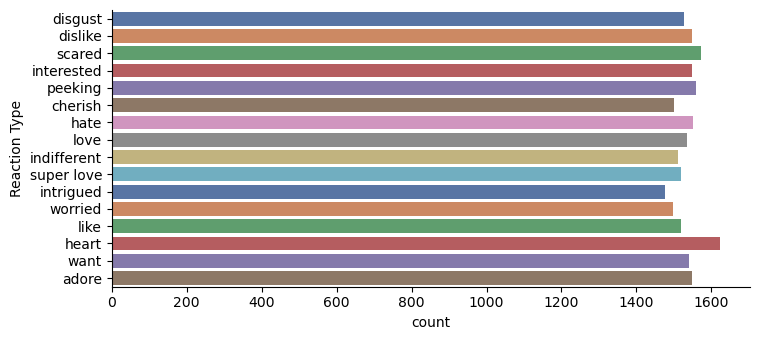

In [38]:
sns.catplot(y='Reaction Type', kind='count', data=df, height=3.5, aspect=2.2, palette = 'deep')
plt.savefig('img_notebook/plot.png')

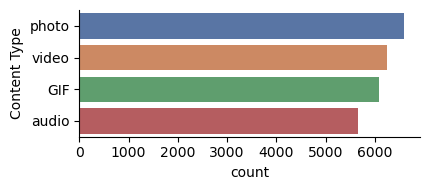

In [39]:
sns.catplot(y='Content Type', kind='count', data=df, height=2.0, aspect=2.2, palette = 'deep')
plt.savefig('img_notebook/plot1.png')

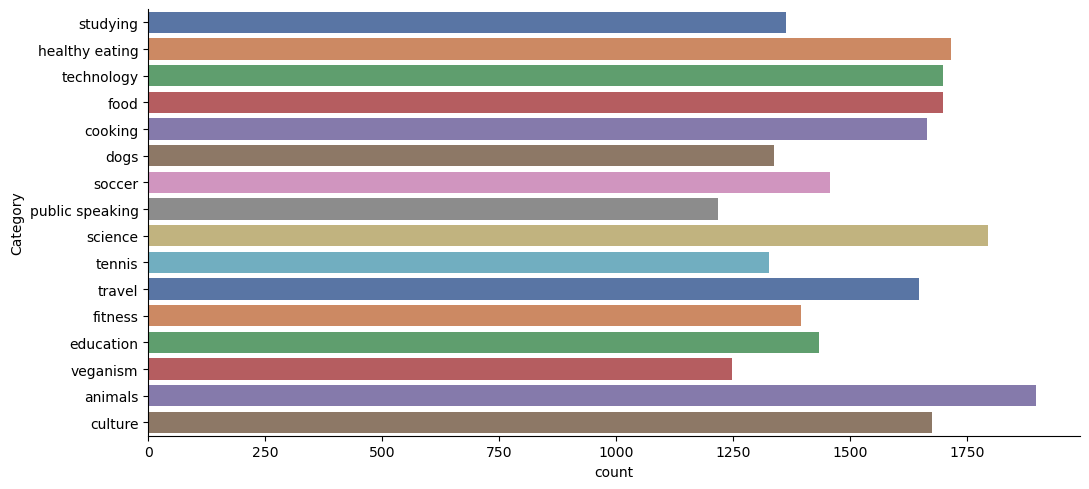

In [40]:
sns.catplot(y='Category', kind='count', data=df, height=5.0, aspect=2.2, palette = 'deep')
plt.savefig('img_notebook/plot2.png')

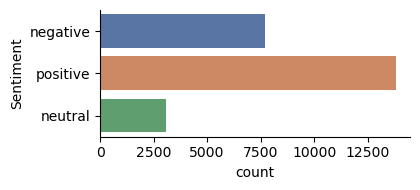

In [41]:
sns.catplot(y='Sentiment', kind='count', data=df, height=2.0, aspect=2.2, palette = 'deep')
plt.savefig('img_notebook/plot3.png')

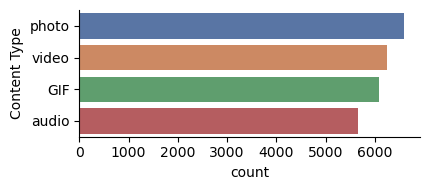

In [42]:
sns.catplot(y='Content Type', kind='count', data=df, height=2.0, aspect=2.2, palette = 'deep')
plt.savefig('img_notebook/plot4.png')

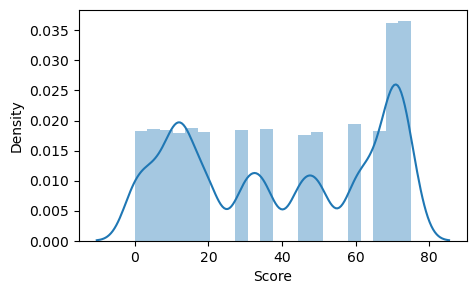

In [43]:
# Mengatur ukuran gambar (figure) menggunakan plt.figure()
plt.figure(figsize=(5, 3)) 
sns.distplot(df['Score'])
plt.savefig('img_notebook/plot5.png')

In [44]:
df.describe()

,Score
count,24573.000000
mean,39.622553
std,26.043011
min,0.000000
25%,15.000000
50%,35.000000
75%,65.000000
max,75.000000


In [45]:
df.describe(include=["object"])

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment
count,24573,24573,24573,24573,24573,24573
unique,962,16,24010,4,16,3
top,5bb364a6-8646-4cdb-b1cf-09f4125718d8,heart,9/2/21 21:34,photo,animals,positive
freq,48,1622,4,6589,1897,13807


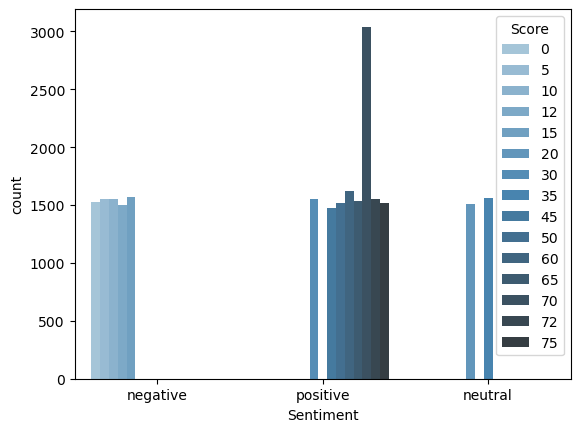

In [53]:
sns.countplot(df['Sentiment'], hue=df['Score'], palette = 'Blues_d')
plt.savefig('img_notebook/sentimentxscore.png')

In [51]:
df.columns

Index(['Content ID', 'Reaction Type', 'Datetime', 'Content Type', 'Category',
       'Sentiment', 'Score'],
      dtype='object')

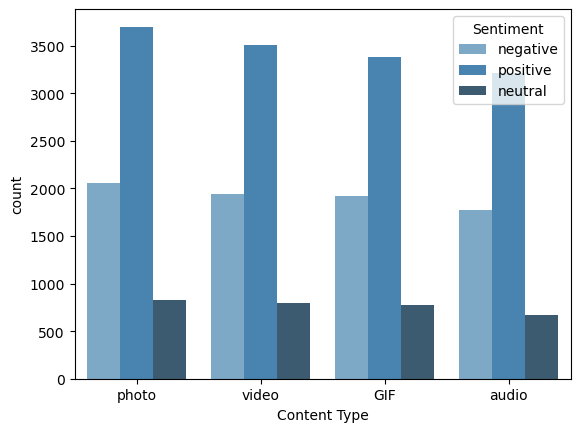

In [57]:
sns.countplot(df['Content Type'], hue=df['Sentiment'], palette = 'Blues_d')
plt.savefig('img_notebook/contenttypexsentiment.png')

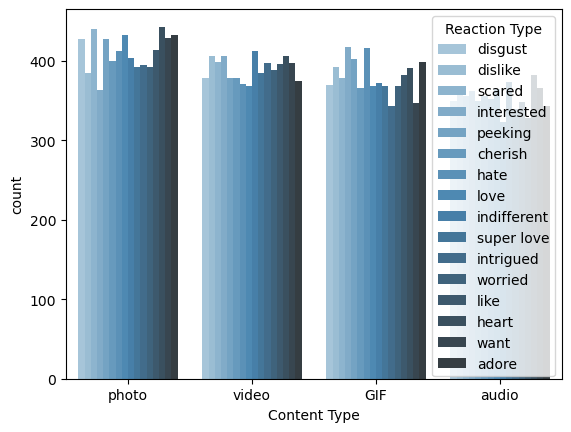

In [58]:
sns.countplot(df['Content Type'], hue=df['Reaction Type'], palette = 'Blues_d')
plt.savefig('img_notebook/contentreact.png')

In [62]:
# Mengurutkan DataFrame berdasarkan kolom "Performa" secara menurun (descending)
df_sorted = df.sort_values(by='Score', ascending=False)

# Mengambil 5 kategori performa terbaik
top_5_categories = df_sorted.head(5)

In [63]:
top_5_categories

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
12468,c5e2d733-94b9-4259-85e8-6fb7a95a1887,super love,5/4/21 13:13,audio,tennis,positive,75
10973,afe1fed5-5639-45c7-89f8-ce9d1078c910,super love,21/5/21 16:11,audio,cooking,positive,75
3133,f01ec49c-3179-43bb-b127-2b1a73f34b06,super love,27/9/20 21:02,photo,animals,positive,75
18807,4bfc9824-aaeb-4695-8195-945686795b30,super love,5/8/20 23:36,video,public speaking,positive,75
1383,e442899c-d2d6-4392-be2d-a0b916ae47fb,super love,17/12/20 14:19,video,technology,positive,75


In [64]:
# Mencari kategori paling populer
most_popular_category = df['Category'].mode().iloc[0]

# Menghitung berapa banyak reaksi untuk kategori paling populer
reactions_count = df[df['Category'] == most_popular_category]['Reaction Type'].count()

print(f"Kategori paling populer adalah {most_popular_category} dengan total {reactions_count} reaksi.")

Kategori paling populer adalah animals dengan total 1897 reaksi.


In [65]:
# Mengubah kolom 'Tanggal_Posting' menjadi tipe data datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Menguraikan tanggal postingan menjadi bulan
df['Month'] = df['Datetime'].dt.month

# Mencari bulan dengan postingan terbanyak
most_posts_month = df['Month'].mode().iloc[0]

print(f"Bulan dengan postingan terbanyak adalah bulan ke-{most_posts_month}.")

Bulan dengan postingan terbanyak adalah bulan ke-1.


There are also some other interesting insights that we might want to share with them. For example:

1. How many unique categories are there?
2. How many reactions are there to the most popular category?
3. What was the month with the most posts?

**insight:**
   1. There are 16 unique categories
   2. The most popular category is animals with a total of 1897 reactions.
   3. The month with the most posts is month 1.